**Brian Blaylock**  
**August 25, 2020**

# 🗼 Example: `metadata`
Get metadata for stations or a set of stations.

Refer to the [Station Selectors in the API docs](https://developers.synopticdata.com/mesonet/v2/station-selectors/) for many ways to filter the stations you want.

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import pandas as pd
from datetime import datetime
import sys

# Need to tell Python where to find `get_Synoptic.py`. 
# This says to look back one directory (relative to this notebook).
sys.path.append('../')

from get_Synoptic import stations_metadata

In [2]:
# Basic example
stations_metadata(stid='KSLC', verbose='HIDE')


 🚚💨 Speedy Delivery from Synoptic API [metadata]: https://api.synopticdata.com/v2/stations/metadata?stid=KSLC&token=🙈HIDDEN



,KSLC
ELEVATION,4226
ELEV_DEM,4235.6
ID,53
MNET_ID,1
NAME,"Salt Lake City, Salt Lake City International A..."
RECORD_END,2020-08-25 00:55:00+00:00
RECORD_START,1997-01-01 00:00:00+00:00
RESTRICTED,False
STATE,UT
STATUS,ACTIVE


## Plot stations by network.
You can see a list of network providers on the [API documents](https://developers.synopticdata.com/about/station-providers/), or use the networks API service. 

This demonstrates how to get the metadata for the Pacific Gas and Electric stations and plot them on a map.

In [3]:
a = stations_metadata(network=229, verbose='HIDE')
a


 🚚💨 Speedy Delivery from Synoptic API [metadata]: https://api.synopticdata.com/v2/stations/metadata?network=229&token=🙈HIDDEN



,PG002,PG003,PG004,PG005,PG006,PG009,PG010,PG011,PG012,PG013,...,PG885,PG883,PG946,PG875,PG968,PG860,PG970,019PG,023PG,026PG
ELEVATION,2487,2230,2964,1060,1033,1184,811,1360,2135,373,...,3835,2857,3873,2275,929,4164,2180,635,627,436
ELEV_DEM,2490.2,2217.8,2956,1059.7,971.1,1227,803.8,561,2122.7,377.3,...,3841.9,2900.3,3881.2,2280.2,905.5,4186.4,2171.9,643,636.5,419.9
ID,65233,65234,65235,65236,65237,70793,70794,70795,70796,70797,...,155270,155294,155295,155462,155470,155487,155488,155495,155496,155497
MNET_ID,229,229,229,229,229,229,229,229,229,229,...,229,229,229,229,229,229,229,229,229,229
NAME,Highland Peak Road,Page Mill Road,Loma Prieta Road,Franz Valley Road,Hogback Road,Weybridge Court,Los Vaqueros,Cull Canyon Road,Sunol Ridge Trail,Palomares Road,...,Shingletown Airport,Pit-Round Mountain,Millwood Road,Foresthill Road South,Boundary,Thatcher Mill Road,Road 110,Pine Canyon Road,Paris Valley Road,Parker Flats Cutoff
RECORD_END,2020-08-25 01:00:00+00:00,2020-08-25 00:40:00+00:00,2020-08-25 01:00:00+00:00,2020-08-25 01:00:00+00:00,2020-08-25 01:00:00+00:00,2020-08-25 01:00:00+00:00,2020-08-25 01:00:00+00:00,2020-08-25 01:00:00+00:00,2020-08-25 01:00:00+00:00,2020-08-25 01:00:00+00:00,...,2020-08-25 01:00:00+00:00,2020-08-25 01:00:00+00:00,2020-08-25 01:00:00+00:00,2020-08-25 01:00:00+00:00,2020-08-25 00:40:00+00:00,2020-08-25 01:00:00+00:00,2020-08-25 01:00:00+00:00,NaT,NaT,NaT
RECORD_START,2018-05-11 22:07:00+00:00,2018-05-11 22:07:00+00:00,2018-05-11 22:07:00+00:00,2018-05-11 22:07:00+00:00,2018-05-11 22:24:00+00:00,2018-06-06 14:14:00+00:00,2018-06-06 14:14:00+00:00,2018-06-06 14:14:00+00:00,2018-06-06 14:14:00+00:00,2018-06-06 14:14:00+00:00,...,2020-08-19 15:15:00+00:00,2020-08-21 00:14:00+00:00,2020-08-21 00:14:00+00:00,2020-08-21 21:14:00+00:00,2020-08-22 03:15:00+00:00,2020-08-25 00:14:00+00:00,2020-08-25 00:14:00+00:00,NaT,NaT,NaT
RESTRICTED,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
STATE,CA,CA,CA,CA,CA,CA,CA,CA,CA,CA,...,CA,CA,CA,CA,CA,CA,CA,CA,CA,CA
STATUS,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,...,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE


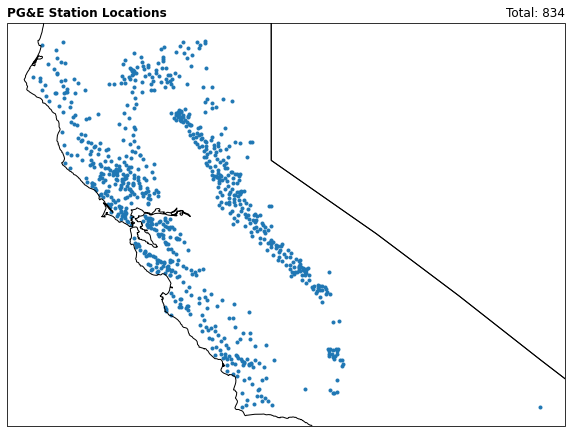

In [4]:
plt.figure(figsize=[10,8])
ax = plt.subplot(projection=ccrs.PlateCarree())

ax.scatter(a.loc['longitude'], a.loc['latitude'], marker='.')


ax.set_title('PG&E Station Locations', loc='left', fontweight='bold')
ax.set_title(f'Total: {len(a.columns)}', loc='right')
ax.add_feature(feature.STATES.with_scale('10m'))

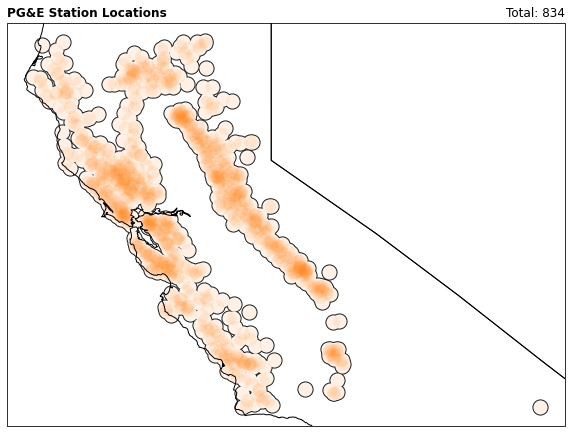

In [5]:
plt.figure(figsize=[10,8])
ax = plt.subplot(projection=ccrs.PlateCarree())

# Plot each station artistically, to illustrate station density
ax.scatter(a.loc['longitude'], a.loc['latitude'], s=200, color='0.1', lw=2)
ax.scatter(a.loc['longitude'], a.loc['latitude'], s=200, color='1.0', lw=0)
ax.scatter(a.loc['longitude'], a.loc['latitude'], s=180, color='C1', lw=0, alpha=.1)


ax.set_title('PG&E Station Locations', loc='left', fontweight='bold')
ax.set_title(f'Total: {len(a.columns)}', loc='right')
ax.add_feature(feature.STATES.with_scale('10m'))

## Show a histogram of when the station's period of record starts

Text(0.5, 1.0, 'Number of new PG&E weather stations installed')

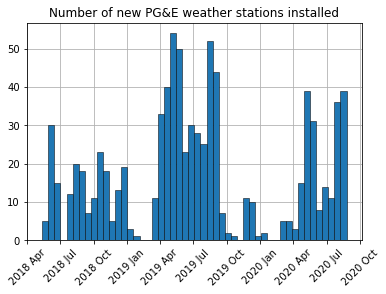

In [37]:
from matplotlib.dates import DateFormatter

a.loc['RECORD_START'].hist(zorder=5, bins=50, edgecolor='k', linewidth=.5)

plt.gca().tick_params(axis='x', labelrotation=45)
date_form = DateFormatter("%Y %b")
plt.gca().xaxis.set_major_formatter(date_form)

plt.title('Number of new PG&E weather stations installed')